In [1]:
import numpy as np
import pandas as pd
import keras
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(2)

print('Libraries imported successfully!!')

Libraries imported successfully!!


In [2]:
credit_data=pd.read_csv('creditcard.csv')
cc_df=pd.DataFrame(credit_data)

## Data Exploration

In [3]:
cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cc_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
cc_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Data Pre-Processing

In [7]:
from sklearn.preprocessing import StandardScaler
cc_df['NormalizedAmount']=StandardScaler().fit_transform(cc_df['Amount'].values.reshape(-1,1))
c_df=cc_df.drop(columns=['Amount','Time'])

In [8]:
c_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
X=c_df.drop(columns=['Class']) 
y=c_df.iloc[:,c_df.columns =='Class']

In [10]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [11]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


# Spliting Data into Training and Testing datasets

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
print('Shape of x_train = ', X_train.shape)
print('Shape of x_test = ', X_test.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of y_test = ', y_test.shape)

Shape of x_train =  (199364, 29)
Shape of x_test =  (85443, 29)
Shape of y_train =  (199364, 1)
Shape of y_test =  (85443, 1)


### Converting dataset into numpy array

In [14]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

## Model 1: Deep Neural Network

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [16]:
model = Sequential([
    Dense(units=16,input_dim=29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

### Model Training

In [18]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 30s 2ms/step - loss: 0.0083 - accuracy: 0.9990
Epoch 2/5
13291/13291 [==============================] - 32s 2ms/step - loss: 0.0040 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 32s 2ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 30s 2ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 5/5
13291/13291 [==============================] - 30s 2ms/step - loss: 0.0033 - accuracy: 0.9994


In [19]:
model_predict=model.evaluate(X_test,y_test)

2671/2671 [==============================] - 4s 2ms/step - loss: 0.0034 - accuracy: 0.9994


In [20]:
print(model_predict)

[0.0033920437563210726, 0.9994031190872192]


In [21]:
y_predict=model.predict(X_test)

2671/2671 [==============================] - 4s 2ms/step


In [22]:
y_test=pd.DataFrame(y_test)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
cm=confusion_matrix(y_test,y_predict.round())

In [25]:
print(cm)

[[85274    22]
 [   29   118]]


<AxesSubplot:>

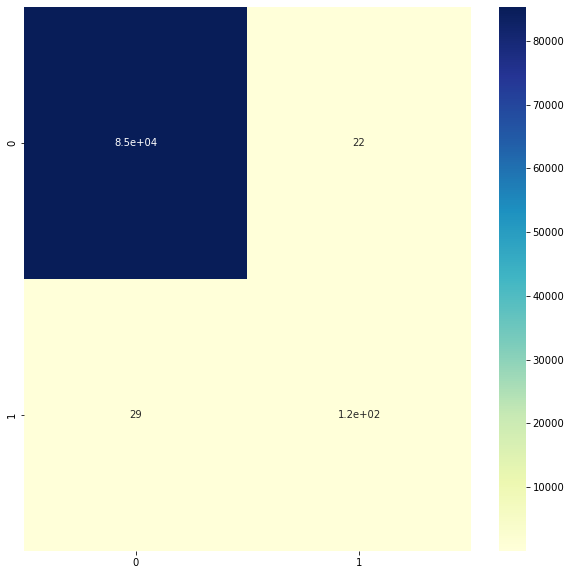

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,cmap="YlGnBu")

In [27]:
print(classification_report(y_test,y_predict.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.84      0.80      0.82       147

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443



##### Testing will whole dataset

In [28]:
y_predict1=model.predict(X)
y_true=pd.DataFrame(y)

8901/8901 [==============================] - 15s 2ms/step


In [29]:
cnf_matrix=confusion_matrix(y_true,y_predict1.round())
print(cnf_matrix)

[[284246     69]
 [    90    402]]


<AxesSubplot:>

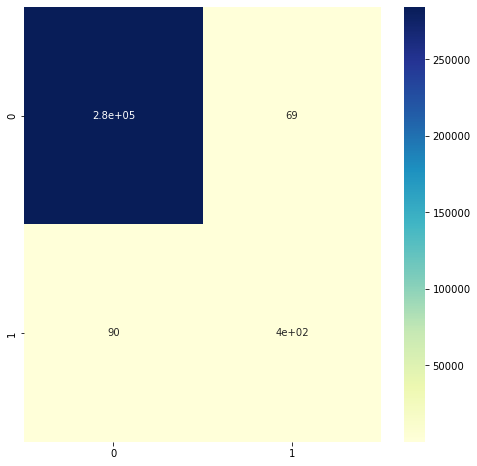

In [30]:
plt.figure(figsize=(8,8))
sns.heatmap(cnf_matrix,annot=True,cmap="YlGnBu")

In [31]:
print(classification_report(y_true,y_predict1.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.85      0.82      0.83       492

    accuracy                           1.00    284807
   macro avg       0.93      0.91      0.92    284807
weighted avg       1.00      1.00      1.00    284807



### Smote (Over_sampling_method)

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
X_resample,y_resample=SMOTE().fit_sample(X,y.values.ravel())

In [34]:
y_resample=pd.DataFrame(y_resample)
X_resample=pd.DataFrame(X_resample)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.3,random_state=0)

In [36]:
X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [37]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
26537/26537 [==============================] - 64s 2ms/step - loss: 0.0318 - accuracy: 0.9893
Epoch 2/5
26537/26537 [==============================] - 57s 2ms/step - loss: 0.0153 - accuracy: 0.9960
Epoch 3/5
26537/26537 [==============================] - 65s 2ms/step - loss: 0.0119 - accuracy: 0.9969
Epoch 4/5
26537/26537 [==============================] - 74s 3ms/step - loss: 0.0111 - accuracy: 0.9973
Epoch 5/5
26537/26537 [==============================] - 57s 2ms/step - loss: 0.0102 - accuracy: 0.9975


In [38]:
model_predict=model.evaluate(X_test,y_test)

5331/5331 [==============================] - 9s 2ms/step - loss: 0.0082 - accuracy: 0.9980


In [39]:
y_predict=model.predict(X_test)
y_test=pd.DataFrame(y_test)

5331/5331 [==============================] - 6s 1ms/step


In [40]:
cm_smot=confusion_matrix(y_test,y_predict.round())

In [41]:
print(cm_smot)

[[84871   301]
 [   39 85378]]


<AxesSubplot:>

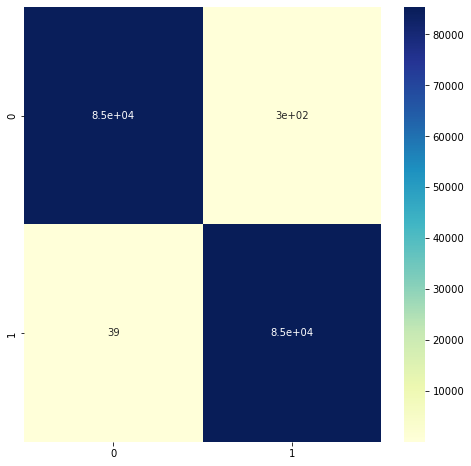

In [42]:
plt.figure(figsize=(8,8))
sns.heatmap(cm_smot,annot=True,cmap="YlGnBu")

In [43]:
print(classification_report(y_test,y_predict.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85172
           1       1.00      1.00      1.00     85417

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



In [44]:
##### Testing will whole dataset

In [45]:
y_predict1=model.predict(X)
y_true=pd.DataFrame(y)

8901/8901 [==============================] - 12s 1ms/step


In [46]:
cnf_matrix=confusion_matrix(y_true,y_predict1.round())
print(cnf_matrix)

[[283355    960]
 [     1    491]]


<AxesSubplot:>

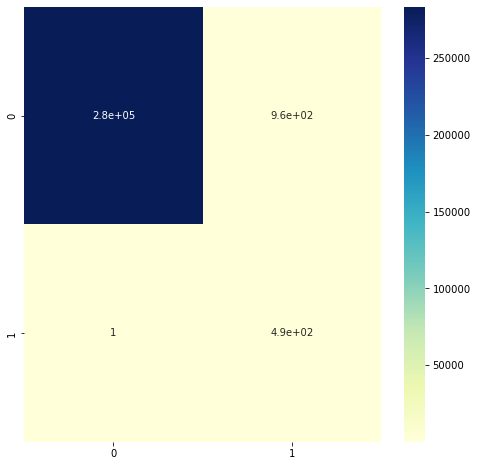

In [47]:
plt.figure(figsize=(8,8))
sns.heatmap(cnf_matrix,annot=True,cmap="YlGnBu")

In [48]:
print(classification_report(y_true,y_predict1.round()))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.34      1.00      0.51       492

    accuracy                           1.00    284807
   macro avg       0.67      1.00      0.75    284807
weighted avg       1.00      1.00      1.00    284807



### Support Vector Machine

In [49]:
from sklearn.svm import SVC
svm_model=SVC()

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [51]:
svm_model.fit(X_train,y_train)

C:\Users\kgyan\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [52]:
y_predsvm=svm_model.predict(X_test)

In [53]:
svm_cm=confusion_matrix(y_test,y_predsvm)

In [54]:
print(svm_cm)

[[85291     5]
 [   51    96]]


In [55]:
print(classification_report(y_test,y_predsvm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.65      0.77       147

    accuracy                           1.00     85443
   macro avg       0.97      0.83      0.89     85443
weighted avg       1.00      1.00      1.00     85443



<AxesSubplot:>

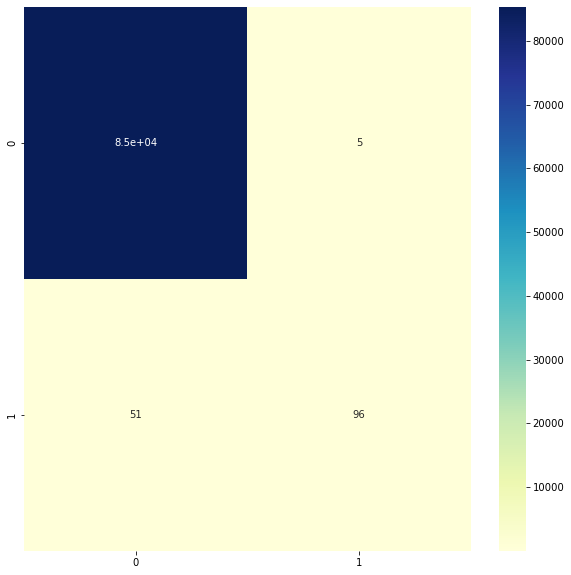

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(svm_cm,annot=True,cmap="YlGnBu")

In [57]:
svm_model.score(X_test,y_test)

0.9993445923013002

### Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier
random_model=RandomForestClassifier(n_estimators=100)

In [59]:
random_model.fit(X_train,y_train.values.ravel())

RandomForestClassifier()

In [60]:
y_rfpred=random_model.predict(X_test)

In [61]:
rf_cm=confusion_matrix(y_test,y_rfpred)

In [62]:
print(rf_cm)

[[85291     5]
 [   33   114]]


<AxesSubplot:>

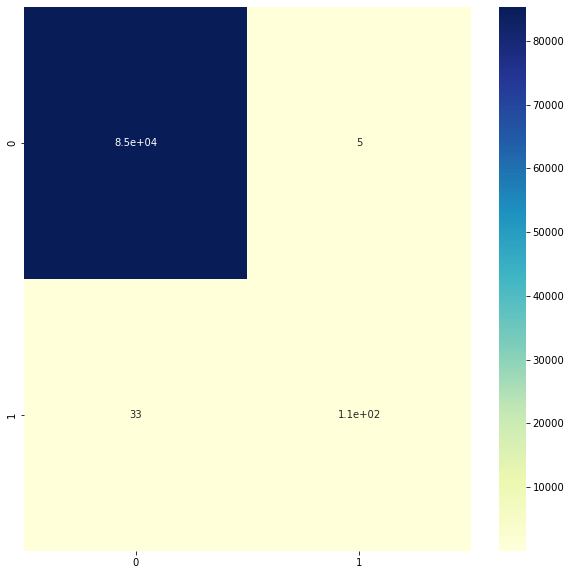

In [63]:
plt.figure(figsize=(10,10))
sns.heatmap(rf_cm,annot=True,cmap="YlGnBu")

In [64]:
print(classification_report(y_test,y_rfpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.96      0.78      0.86       147

    accuracy                           1.00     85443
   macro avg       0.98      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



In [65]:
random_model.score(X_test,y_test)

0.9995552590615966

### Decision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()

In [67]:
model_dt.fit(X_train,y_train.values.ravel())

DecisionTreeClassifier()

In [68]:
y_dtpred=model_dt.predict(X_test)

In [69]:
dt_cm=confusion_matrix(y_test,y_dtpred)

In [70]:
print(dt_cm)

[[85271    25]
 [   37   110]]


<AxesSubplot:>

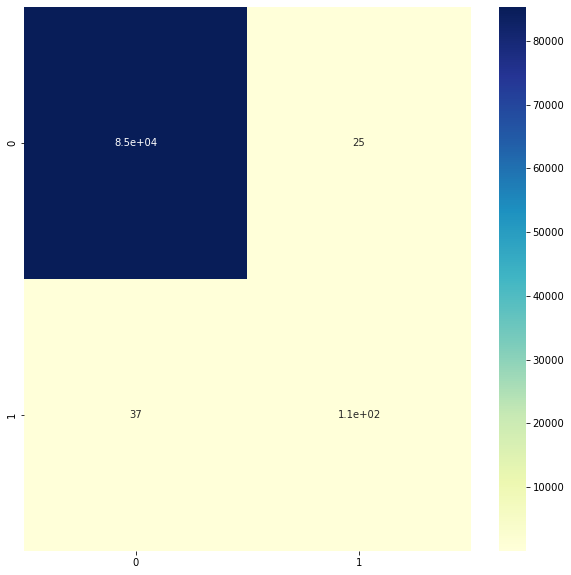

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(dt_cm,annot=True,cmap="YlGnBu")

In [72]:
print(classification_report(y_test,y_dtpred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.81      0.75      0.78       147

    accuracy                           1.00     85443
   macro avg       0.91      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443



In [73]:
model_dt.score(X_test,y_test)

0.9992743700478681